In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/KalyanM45/Complete-Data-Science-Materials/5fa8e187f90fc69a1254309a05ee614d020fab3b/Machine%20Learning/2-Complete%20Linear%20Regression/Practicals/economic_index.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
### drop uneccesary columns
df.drop(["Unnamed: 0","year","month"],axis=1,inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
### check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

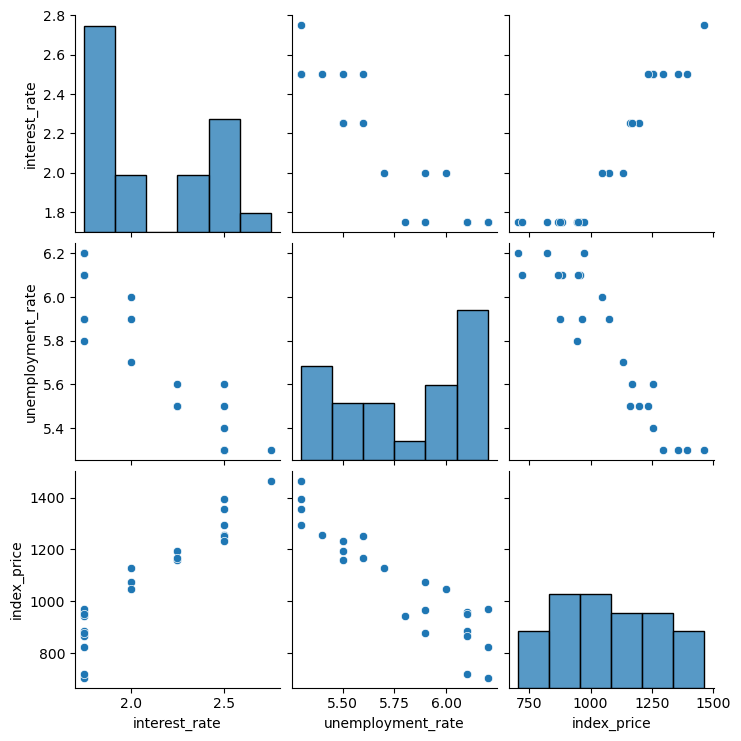

In [7]:
### visualization

sns.pairplot(df)

In [10]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

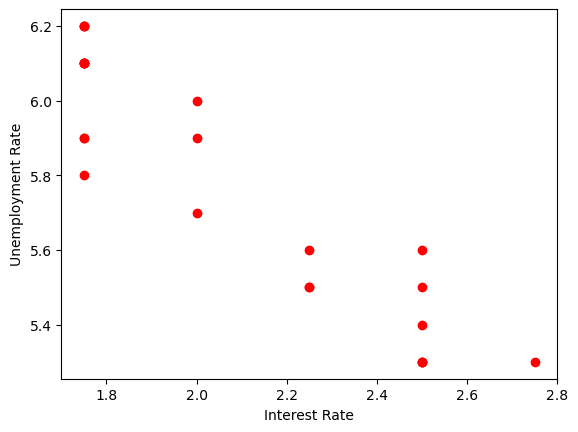

In [9]:
### visualize more closely
plt.scatter(df["interest_rate"],df["unemployment_rate"],color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

In [11]:
##independent and dependent features

In [16]:
X=df[['interest_rate','unemployment_rate']]
y=df["index_price"]
X.head()
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [18]:
## another way of getting independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [19]:
# train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [20]:
### in seaborn we have regplot to see regression plot for our data

<Axes: xlabel='interest_rate', ylabel='index_price'>

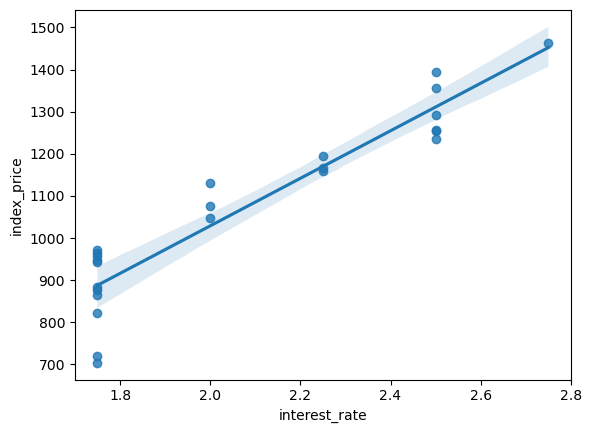

In [23]:
sns.regplot(x=df["interest_rate"],y=df["index_price"])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

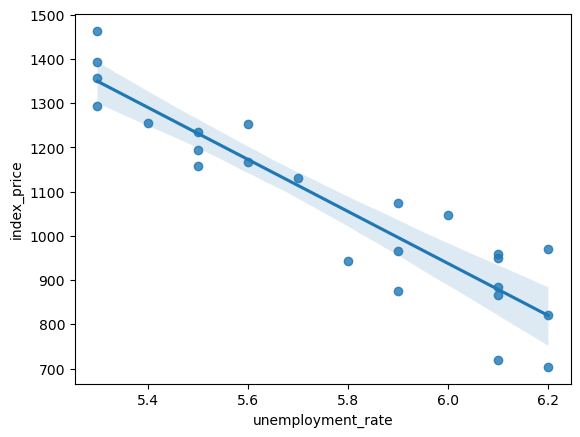

In [26]:
sns.regplot(x=df["unemployment_rate"],y=df["index_price"])

<Axes: xlabel='unemployment_rate', ylabel='interest_rate'>

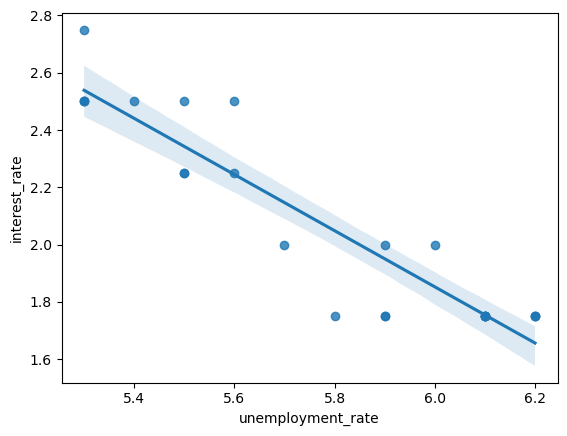

In [27]:
sns.regplot(x=df["unemployment_rate"],y=df["interest_rate"])

In [29]:
### in video he scaled down after splitting but why that much work if we scale down before then it will automatically split it right
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [36]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [37]:
regression.fit(X_train,y_train)

LinearRegression()

In [53]:
print("coefficient or slope:",regression.coef_)
print("intercept:",regression.intercept_)

coefficient or slope: [  88.27275507 -116.25716066]
intercept: 1053.4444444444443


In [41]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=3)

In [74]:

np.mean(validation_score)
##with this score it tells how good our model is here we used negmeansquared error that mean if it close to 0 then our model is good 

-5914.8281801623925

In [47]:
## prediction

y_pred=regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [55]:
## performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [56]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [57]:
### r2 score
from sklearn.metrics import r2_score

In [58]:
score=r2_score(y_test,y_pred)
print(score)

0.7591371539010257


In [59]:
### adjusted r2 value
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5985619231683761

In [76]:
### OLS LINEAR REGRESSION
import statsmodels.api as sm

In [77]:
model=sm.OLS(y_train,X_train).fit()

In [78]:
prediction=model.predict(X_test)

In [79]:
print(prediction)

[ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]


In [80]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 23 Mar 2025   Prob (F-statistic):                       0.754
Time:                        11:02:57   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/conda/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Assumptions

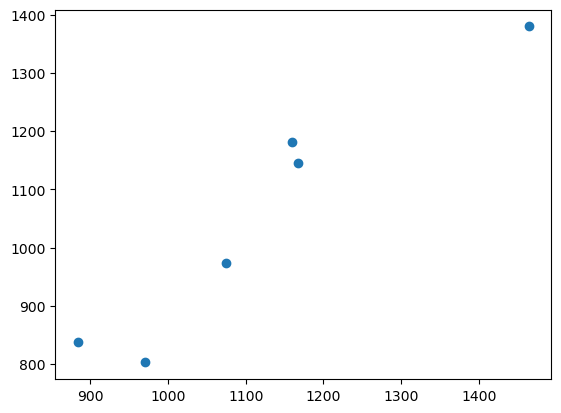

In [61]:
plt.scatter(y_test,y_pred)

In [62]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


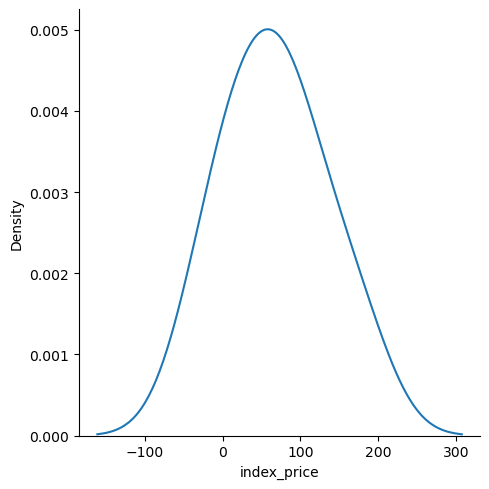

In [68]:
sns.displot(residuals,kind="kde")

In [69]:
## if we get above type of normal curve then our model is good

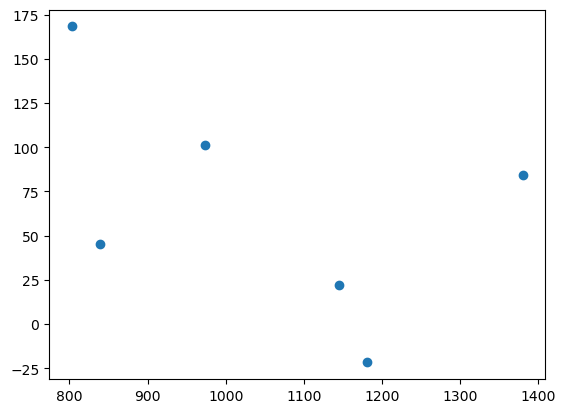

In [71]:
### scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [72]:
### so if we get uniforms distribute between them then there is no problem at all